**Some examples on how to use the OMS API**  

The following topics are covered:  
- creating an OMS API instance
- get all available information per run or for a given range of runs
- get all available information per lumisection
- select specific data fields to retrieve
- get L1 and HLT trigger rates

In [1]:
### imports

# external modules
import matplotlib.pyplot as plt
import importlib

# local modules
import get_oms_data
importlib.reload(get_oms_data)
from get_oms_data import get_oms_api, get_oms_data, get_oms_response_attribute

In [2]:
# get the omsapi instance

omsapi = get_oms_api()

In [3]:
# example: get run information for a single run

runnb = 297050
run_info = get_oms_data( omsapi, 'runs', runnb )
print(run_info)

https://vocms0185.cern.ch/agg/api/v1/runs/?filter[run_number][EQ]=297050&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/runs/?filter[run_number][EQ]=297050&page[offset]=0&page[limit]=1000
{'data': [{'id': '297050', 'type': 'runs', 'attributes': {'components': ['CSC', 'CTPPS', 'CTPPS_TOT', 'DAQ', 'DCS', 'DQM', 'DT', 'ECAL', 'ES', 'HCAL', 'HF', 'PIXEL', 'RPC', 'SCAL', 'TCDS', 'TRACKER', 'TRG'], 'l1_hlt_mode_stripped': 'collisions2017/v106', 'l1_key': 'l1_trg_collisions2017/v37', 'duration': 18444, 'b_field': 3.799, 'tier0_transfer': True, 'l1_triggers_counter': 900142261, 'hlt_physics_throughput': 0.77342418, 'init_lumi': 6885.202148, 'last_update': '2017-06-16T21:13:57Z', 'beamactive_total_deadtime': 3.35, 'recorded_lumi': 103.19148, 'delivered_lumi': 106.148066, 'cmssw_version': 'CMSSW_9_2_3_patch2', 'crossing_angle_stop': 150.0, 'energy': 6499.0, 'end_lumi': 5031.490723, 'hlt_physics_rate': 1026.971, 'fill_number': 5839, 'l1_hlt_mode': 'collisions2017', 'end_time

In [4]:
# example: get only specific info for a single run

runnb = 297050
run_info_spec = get_oms_data( omsapi, 'runs', runnb, attributes=['l1_rate','l1_menu'] )
print(run_info_spec,"\n")
print('\n\n',run_info_spec['data'])
print('--'*12+'\n\n',run_info_spec['data'][0]['attributes'])

https://vocms0185.cern.ch/agg/api/v1/runs/?fields=l1_rate,l1_menu&filter[run_number][EQ]=297050&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/runs/?fields=l1_rate,l1_menu&filter[run_number][EQ]=297050&page[offset]=0&page[limit]=1000
{'data': [{'id': '297050', 'type': 'runs', 'attributes': {'l1_rate': 49130.85, 'l1_menu': 'L1Menu_Collisions2017_dev_r5'}, 'links': {'self': 'https://https://vocms0185.cern.ch/agg/api/v1/runs/297050'}}], 'links': {'first': 'https://https://vocms0185.cern.ch/agg/api/v1/runs?page[limit]=1000&filter[runs][run_number][EQ]=297050&fields[runs]=l1_rate%2Cl1_menu', 'last': 'https://https://vocms0185.cern.ch/agg/api/v1/runs?page[limit]=1000&filter[runs][run_number][EQ]=297050&fields[runs]=l1_rate%2Cl1_menu', 'next': None, 'prev': None}, 'meta': {'totalResourceCount': 1}} 



 [{'id': '297050', 'type': 'runs', 'attributes': {'l1_rate': 49130.85, 'l1_menu': 'L1Menu_Collisions2017_dev_r5'}, 'links': {'self': 'https://https://vocms0185.cern.ch/agg

In [5]:
# example: get specific run information for multiple runs

runnb = (297050,297056)
run_info_mult = get_oms_data( omsapi, 'runs', runnb, attributes=['l1_rate','l1_menu'] )
print(run_info_mult)
l1_rate = get_oms_response_attribute( run_info_mult, 'l1_rate' )
print(l1_rate)

https://vocms0185.cern.ch/agg/api/v1/runs/?fields=l1_rate,l1_menu&filter[run_number][GE]=297050&filter[run_number][LE]=297056&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/runs/?fields=l1_rate,l1_menu&filter[run_number][GE]=297050&filter[run_number][LE]=297056&page[offset]=0&page[limit]=1000
{'data': [{'id': '297050', 'type': 'runs', 'attributes': {'l1_rate': 49130.85, 'l1_menu': 'L1Menu_Collisions2017_dev_r5'}, 'links': {'self': 'https://https://vocms0185.cern.ch/agg/api/v1/runs/297050'}}, {'id': '297051', 'type': 'runs', 'attributes': {'l1_rate': 1114.198, 'l1_menu': 'L1Menu_Collisions2017_dev_r5'}, 'links': {'self': 'https://https://vocms0185.cern.ch/agg/api/v1/runs/297051'}}, {'id': '297052', 'type': 'runs', 'attributes': {'l1_rate': 766.784, 'l1_menu': 'L1Menu_Collisions2017_dev_r5'}, 'links': {'self': 'https://https://vocms0185.cern.ch/agg/api/v1/runs/297052'}}, {'id': '297053', 'type': 'runs', 'attributes': {'l1_rate': 972.374, 'l1_menu': 'L1Menu_Collision

In [12]:
### example: get available information per lumisection

runnb = 297050
lsfilter = {'attribute_name':'lumisection_number','value':1,'operator':'EQ'}
ls_info = get_oms_data( omsapi, 'lumisections', runnb, extrafilters=[lsfilter] )
attrs = ls_info['data'][0]['attributes']
for key,val in attrs.items():
    print('{} -> {}'.format(key,val))

https://vocms0185.cern.ch/agg/api/v1/lumisections/?filter[run_number][EQ]=297050&filter[lumisection_number][EQ]=1&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/lumisections/?filter[run_number][EQ]=297050&filter[lumisection_number][EQ]=1&page[offset]=0&page[limit]=1000
rp_time_ready -> None
cscp_ready -> True
beam1_present -> True
physics_flag -> True
dt0_ready -> True
bpix_ready -> True
ho_ready -> True
dtp_ready -> True
tecm_ready -> True
gem_ready -> None
lumisection_number -> 1
tibtid_ready -> True
fpix_ready -> True
rpc_ready -> True
rp_sect_56_ready -> None
castor_ready -> False
init_lumi -> 6885.20214844
pileup -> 40.37966919
esp_ready -> True
hbhea_ready -> True
eep_ready -> True
ebm_ready -> True
recorded_lumi -> 25.67151953
delivered_lumi -> 34.78266797
dtm_ready -> True
gemp_ready -> None
eem_ready -> True
end_lumi -> 0.0
fill_number -> 5839
esm_ready -> True
tecp_ready -> True
gemm_ready -> None
ebp_ready -> True
end_time -> 2017-06-16T20:51:50Z
hf_rea

In [13]:
ls_info

{'data': [{'id': '297050_1',
   'type': 'lumisections',
   'attributes': {'rp_time_ready': None,
    'cscp_ready': True,
    'beam1_present': True,
    'physics_flag': True,
    'dt0_ready': True,
    'bpix_ready': True,
    'ho_ready': True,
    'dtp_ready': True,
    'tecm_ready': True,
    'gem_ready': None,
    'lumisection_number': 1,
    'tibtid_ready': True,
    'fpix_ready': True,
    'rpc_ready': True,
    'rp_sect_56_ready': None,
    'castor_ready': False,
    'init_lumi': 6885.20214844,
    'pileup': 40.37966919,
    'esp_ready': True,
    'hbhea_ready': True,
    'eep_ready': True,
    'ebm_ready': True,
    'recorded_lumi': 25.67151953,
    'delivered_lumi': 34.78266797,
    'dtm_ready': True,
    'gemp_ready': None,
    'eem_ready': True,
    'end_lumi': 0.0,
    'fill_number': 5839,
    'esm_ready': True,
    'tecp_ready': True,
    'gemm_ready': None,
    'ebp_ready': True,
    'end_time': '2017-06-16T20:51:50Z',
    'hf_ready': True,
    'rp_sect_45_ready': None,
    

https://vocms0185.cern.ch/agg/api/v1/lumisections/?fields=pileup,lumisection_number,recorded_lumi,delivered_lumi&filter[run_number][EQ]=297050&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/lumisections/?fields=pileup,lumisection_number,recorded_lumi,delivered_lumi&filter[run_number][EQ]=297050&page[offset]=0&page[limit]=1000


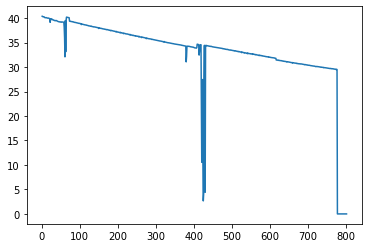

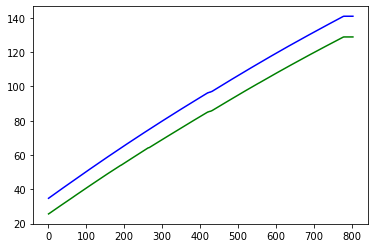

In [7]:
# example: get pileup and luminosity information per lumisection

runnb = 297050
ls_info = get_oms_data( omsapi, 'lumisections', runnb, attributes=['lumisection_number','pileup','delivered_lumi','recorded_lumi'] )
#print(ls_info)
ls_nbs = get_oms_response_attribute(ls_info,'lumisection_number')
pileup = get_oms_response_attribute(ls_info,'pileup')
del_lumi = get_oms_response_attribute(ls_info,'delivered_lumi')
rec_lumi = get_oms_response_attribute(ls_info,'recorded_lumi')

plt.figure()
plt.plot(ls_nbs,pileup)
plt.figure()
plt.plot(ls_nbs,del_lumi,color='b')
plt.plot(ls_nbs,rec_lumi,color='g')

https://vocms0185.cern.ch/agg/api/v1/l1triggerrates/?filter[run_number][EQ]=297050&page[offset]=0&page[limit]=1000&group[granularity]=lumisection
https://vocms0185.cern.ch/agg/api/v1/l1triggerrates/?filter[run_number][EQ]=297050&page[offset]=0&page[limit]=1000&group[granularity]=lumisection
physics_generated_fdl_tcds -> {'counter': 771187, 'rate': 33083.99}
trigger_physics_lost -> {'counter': 213684, 'rate': 9167.062}
l1a_total -> {'counter': 569191, 'rate': 24418.342}
l1a_calibration -> {'counter': 1710, 'rate': 73.359146}
trigger_physics_lost_beam_inactive -> {'counter': 20513, 'rate': 880.0088}
total_before_deadtime -> {'counter': 786690, 'rate': 33749.066}
physics_generated_fdl_gt -> {'counter': None, 'rate': None}
l1a_random -> {'counter': 9978, 'rate': 428.05707}
trigger_physics_lost_beam_active -> {'counter': 193171, 'rate': 8287.053}
start_time -> 2017-06-16T20:51:27Z
last_lumisection_number -> 1
run_number -> 297050
first_lumisection_number -> 1
l1a_physics -> {'counter': 5575

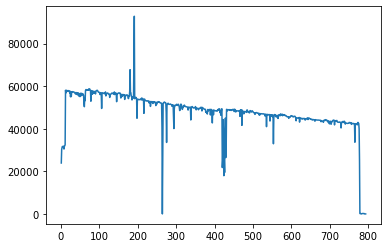

In [8]:
### example: get L1 trigger rate per lumisection

import numpy as np

runnb = 297050
#lsfilter = {'attribute_name':'lumisection_number','value':10,'operator':'LT'}
ls_info = get_oms_data( omsapi, 'l1triggerrates', runnb, extraargs={'group[granularity]':'lumisection'} )
#print(ls_info)
attrs = ls_info['data'][0]['attributes']
for attr in attrs: print('{} -> {}'.format(attr,attrs[attr]))
lsnbs = get_oms_response_attribute(ls_info,'first_lumisection_number')
l1_rate = get_oms_response_attribute(ls_info,'l1a_physics')
l1_rate = [el['rate'] for el in l1_rate]
#print(l1_rate)
print(np.mean(l1_rate))
plt.figure()
plt.plot(lsnbs,l1_rate)

https://vocms0185.cern.ch/agg/api/v1/hltpathinfo/?fields=run_number,path_name&filter[run_number][EQ]=297050&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathinfo/?fields=run_number,path_name&filter[run_number][EQ]=297050&page[offset]=0&page[limit]=1000
available path names:
['AlCa_EcalEtaEBonly_v9', 'AlCa_EcalEtaEEonly_v9', 'AlCa_EcalPhiSym_v7', 'AlCa_EcalPi0EBonly_v9', 'AlCa_EcalPi0EEonly_v9', 'AlCa_LumiPixels_Random_v2', 'AlCa_LumiPixels_ZeroBias_v6', 'AlCa_RPCMuonNormalisation_v11', 'DST_Physics_v6', 'HLT_AK4CaloJet100_v5', 'HLT_AK4CaloJet120_v4', 'HLT_AK4CaloJet30_v6', 'HLT_AK4CaloJet40_v5', 'HLT_AK4CaloJet50_v5', 'HLT_AK4CaloJet80_v5', 'HLT_AK4PFJet100_v8', 'HLT_AK4PFJet120_v7', 'HLT_AK4PFJet30_v8', 'HLT_AK4PFJet50_v8', 'HLT_AK4PFJet80_v8', 'HLT_AK8PFJet140_v5', 'HLT_AK8PFJet200_v5', 'HLT_AK8PFJet260_v6', 'HLT_AK8PFJet320_v6', 'HLT_AK8PFJet400_v6', 'HLT_AK8PFJet40_v6', 'HLT_AK8PFJet450_v6', 'HLT_AK8PFJet500_v6', 'HLT_AK8PFJet550_v1', 'HLT_AK8PFJet60_v5',

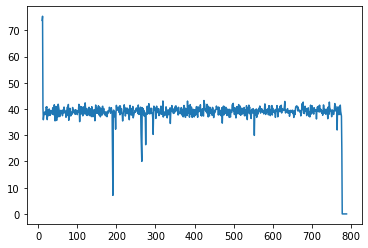

In [9]:
### example: get HLT trigger rate per lumisection

runnb = 297050
ls_info = get_oms_data( omsapi, 'hltpathinfo', runnb, attributes=['run_number','path_name'] )
#print(ls_info)
print('available path names:')
print(get_oms_response_attribute(ls_info,'path_name'))

path_filter = {'attribute_name':'path_name','value':'HLT_ZeroBias_v5','operator':'EQ'}
ls_info = get_oms_data( omsapi, 'hltpathrates', runnb, extraargs={'group[granularity]':'lumisection'}, extrafilters=[path_filter] )
#print(ls_info)
lsnbs = get_oms_response_attribute(ls_info,'first_lumisection_number')
hlt_rate = get_oms_response_attribute(ls_info,'rate')
#print(hlt_rate)
plt.figure()
plt.plot(lsnbs,hlt_rate)

In [10]:
### example: check if 'cms_active' attribute is same as DCS-json

import os
import sys
sys.path.append(os.path.abspath('../utils/'))
import json_utils as jsonu
import plot_utils as pu

https://vocms0185.cern.ch/agg/api/v1/lumisections/?fields=lumisection_number,cms_active&filter[run_number][EQ]=306458&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/lumisections/?fields=lumisection_number,cms_active&filter[run_number][EQ]=306458&page[offset]=0&page[limit]=1000
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='lumisection number'>)

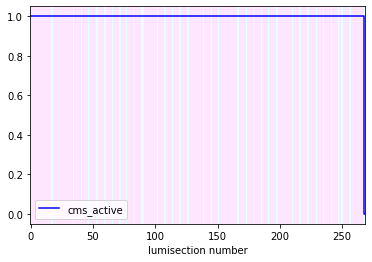

In [11]:
runnb = 306458
ls_info = get_oms_data( omsapi, 'lumisections', runnb, attributes=['lumisection_number','cms_active'] )
lsnbs = get_oms_response_attribute(ls_info,'lumisection_number')
cms_active = get_oms_response_attribute(ls_info,'cms_active')
print(cms_active)
runnbs = [runnb]*len(lsnbs)
dcson = jsonu.isdcson( runnbs, lsnbs )
print(dcson)
pu.plot_hists([cms_active],colorlist=['blue'], labellist=['cms_active'],
              xaxtitle='lumisection number', yaxtitle=None, bkgcolor=dcson, bkgcmap='cool')